In [7]:
# package imports
using Random
using Distributions
using Plots
using ColorSchemes
using ProgressBars

# module imports
include("../SpikeNeuron.jl")
using .SpikeNeuron: InputPattern, NeuronModel, Vt, findNextSpike!, simulateEventBased!, simulateClockBased!, resetNeuron!

# debug
ENV["JULIA_DEBUG"] = nothing
# ENV["JULIA_DEBUG"] = Main

Threads.nthreads()

4

In [8]:
#=
Run the neuron with a random input pattern
=#

N = 500

# Generate input pattern
pattern = InputPattern(N, 0, 500, 0.005)

# initialise neuron
neuron = NeuronModel(N)

# compute event-based neural response
eventSpikes = simulateEventBased!(neuron, pattern)
resetNeuron!(neuron)

eventSpikes

6-element Vector{Float64}:
  50.051250690048704
 256.4823776767263
 332.9342397558281
 390.20305104878366
 441.01390421020346
 495.57273917740747

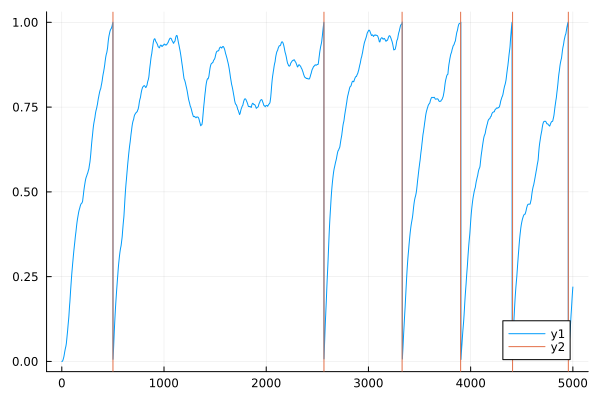

In [9]:
# compute clock-based neural response
tStart, tEnd, dt = 0, 500, 0.1

clockSpikes, Vs = simulateClockBased!(neuron, pattern, tStart, tEnd, dt)
resetNeuron!(neuron)

plot(Vs)
vline!(eventSpikes/dt)

In [10]:
rangeEm = -2:0.5:1000
rangeEs = -2:0.5:1000

ts = ones(length(rangeEm), length(rangeEs)) * -1

Threads.@threads for m in 1:length(rangeEm)
    for s in 1:length(rangeEs)
        neuron = NeuronModel(N)
        resetNeuron!(neuron, Float64(rangeEm[m]), Float64(rangeEs[s]))

        V = Vt(1, neuron)
        if V < neuron.ϑ
            tOut = findNextSpike!(neuron, 1, 1000)
            if !isnothing(tOut) && tOut > 1
                ts[m, s] = tOut
            end
        end#if
    end#for
end#for

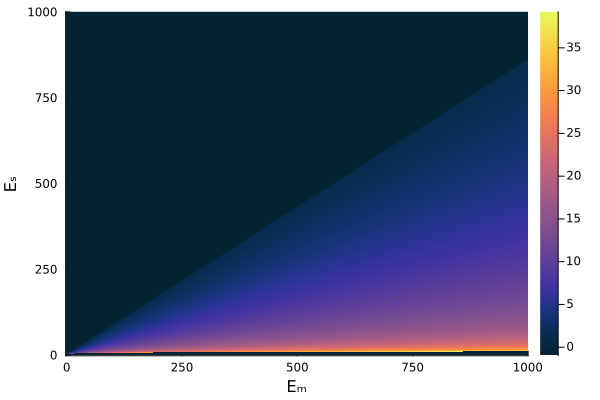

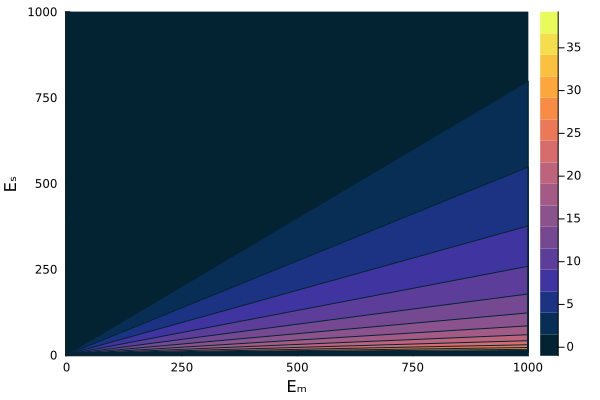

In [11]:
# relationship between state variables and first spike time
display(heatmap(rangeEm, rangeEs, ts, xlabel="Eₘ", ylabel="Eₛ", fill=true, c=:thermal))
display(contour(rangeEm, rangeEs, ts, xlabel="Eₘ", ylabel="Eₛ", fill=true, c=:thermal))